In [2]:
import numpy as np
import matplotlib.pyplot as plt

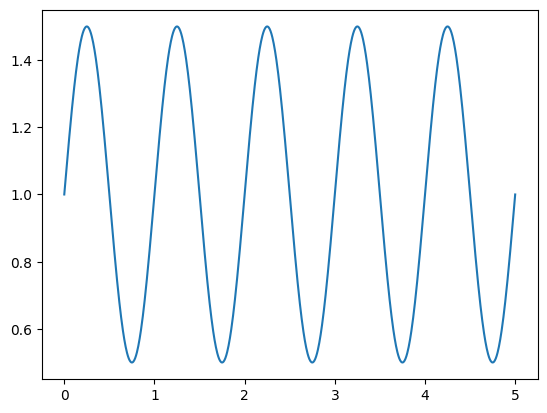

In [8]:
rho = 1 # > 0
T = 1 # > 0

def K(t):
   # Must have period T, and > 0
   # Otherwise arbitrary
   return 1 + 0.5 * np.sin(2 * np.pi * t / T)
   
t = np.linspace(0, 5, 1000)
plt.plot(t, K(t))

In [18]:
def H(u):
    return rho * np.exp(rho * u) / K(u)

from scipy.integrate import quad

# Integrate H(u) from 0 to T with numerical integration
theta = quad(H, 0, T)[0]
print(f"theta: {theta}")

theta: 2.1435117689994914


In [19]:
a = (np.exp(rho * T) - 1) / theta 
N0 = 2 * a # We just require N0 > 2, so take 2 times
print(f"N0: {N0}")

N0: 1.6032399292690358


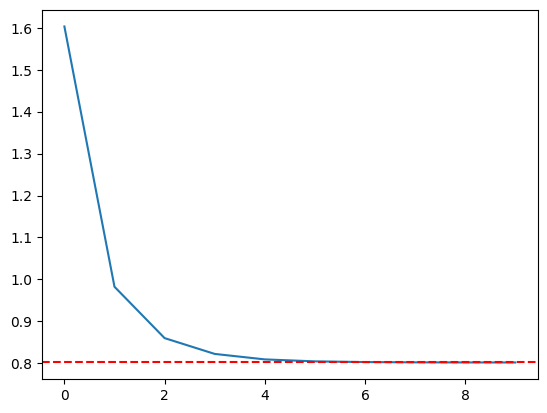

In [17]:
def F(k):
    lower_frac = (1 - np.exp(rho * k * T)) / (1 - np.exp(rho * T))
    return (N0 * np.exp(rho * k * T)
            / (1 + N0 * lower_frac * theta))
    
# From part c
asymptote = (np.exp(rho * T) - 1) / theta
    
k = np.arange(0, 10)
plt.plot(k, F(k))
plt.axhline(asymptote, color='red', linestyle='--')
plt.show()